In [2]:
!pip install scikit-surprise
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357240 sha256=9b9f1b6370c5b1a1f886ff45e8cfe230d7ce240e722fff633450e9a273e8155e
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, KNNBasic, NMF, accuracy
from surprise.model_selection import train_test_split
import streamlit as st

In [4]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the dataset
spotify_songs_df = pd.read_csv('/content/spotify_songs.csv')
spotify_songs_df.head()

Saving spotify_songs.csv to spotify_songs (1).csv


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
# Check for missing values
spotify_songs_df.isnull().sum()

# Handle missing values if any (for now, assuming there are no missing values)

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [6]:
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = StandardScaler()
spotify_songs_df[audio_features] = scaler.fit_transform(spotify_songs_df[audio_features])


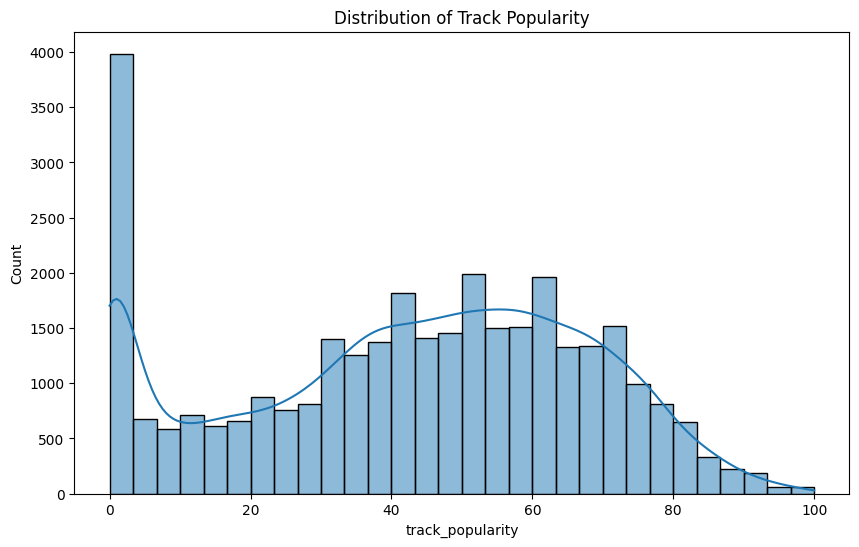

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(spotify_songs_df['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.show()

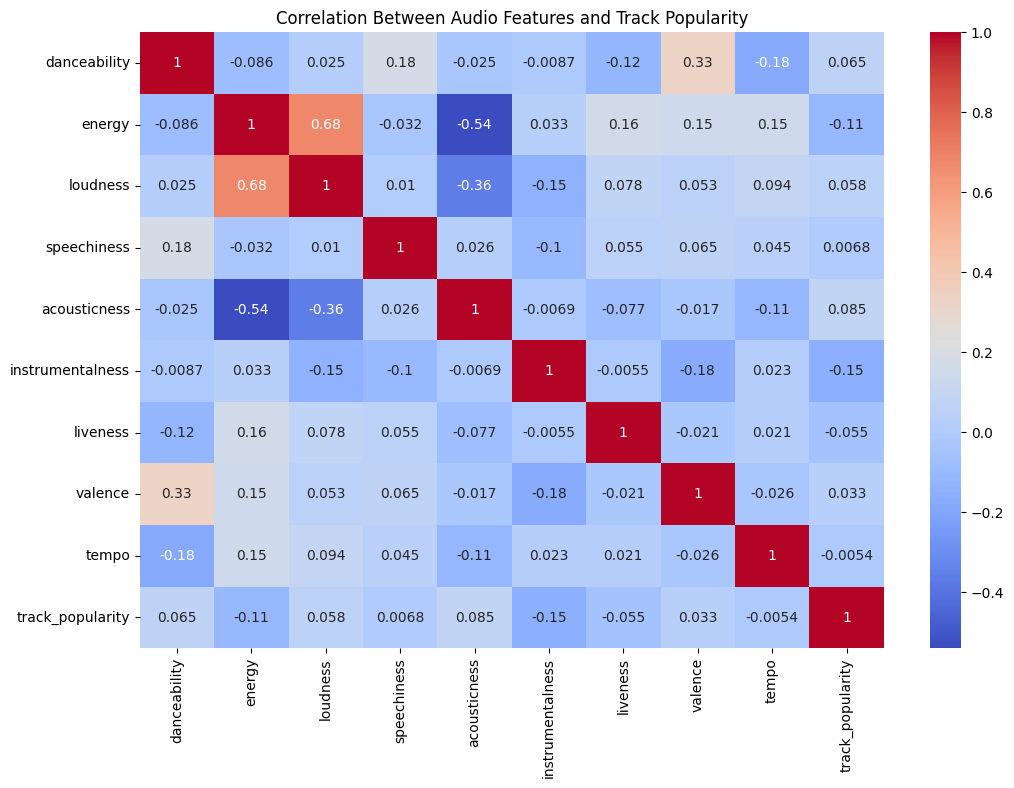

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(spotify_songs_df[audio_features + ['track_popularity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features and Track Popularity')
plt.show()

In [12]:
# Check for missing values in 'track_name' column
print(spotify_songs_df['track_name'].isnull().sum())

# Handle missing values (e.g., drop rows with missing values)
spotify_songs_df.dropna(subset=['track_name'], inplace=True)

# Now you can proceed with CountVectorizer
vectorizer = CountVectorizer()
track_name_vec = vectorizer.fit_transform(spotify_songs_df['track_name'])
track_artist_vec = vectorizer.fit_transform(spotify_songs_df['track_artist'])

5


In [13]:
similarity_matrix = cosine_similarity(spotify_songs_df[audio_features])

def recommend_songs(track_id, num_recommendations=5):
    idx = spotify_songs_df.index[spotify_songs_df['track_id'] == track_id].tolist()[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    song_indices = [i[0] for i in sim_scores]
    return spotify_songs_df.iloc[song_indices][['track_name', 'track_artist']]

# Example recommendation
recommend_songs('6f807x0ima9a1j3VPbc7VN')


,track_name,track_artist
29684,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran
29734,I Miss You (feat. Julia Michaels) - Cahill Remix,Clean Bandit
29713,Rise - TV Noise Ibiza Mix,Jonas Blue
4959,Name & Number,Shift K3Y
302,Who's Got Your Love,Cheat Codes


In [15]:
# Load data into Surprise
reader = Reader(rating_scale=(0, 100))

# Create a dummy user ID column
# Assuming all track popularity ratings are from the same user
spotify_songs_df['user_id'] = 1

# The DataFrame now has the expected three columns
data = Dataset.load_from_df(spotify_songs_df[['user_id', 'track_id', 'track_popularity']], reader)

# Split the data into training and test set
trainset, testset = train_test_split(data, test_size=0.2)

# KNN model
algo_knn = KNNBasic()
algo_knn.fit(trainset)
predictions_knn = algo_knn.test(testset)
accuracy.rmse(predictions_knn)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 21.2302


21.23016534155432

In [16]:
# NMF model
algo_nmf = NMF()
algo_nmf.fit(trainset)
predictions_nmf = algo_nmf.test(testset)
accuracy.rmse(predictions_nmf)


RMSE: 32.4121


32.41210522978415

In [17]:
# Compare RMSE of KNN and NMF models
rmse_knn = accuracy.rmse(predictions_knn)
rmse_nmf = accuracy.rmse(predictions_nmf)

print(f"KNN RMSE: {rmse_knn}")
print(f"NMF RMSE: {rmse_nmf}")


RMSE: 21.2302
RMSE: 32.4121
KNN RMSE: 21.23016534155432
NMF RMSE: 32.41210522978415
